In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.metrics import explained_variance_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('heart.csv')
df.head(10)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


Text(0.5, 1.0, 'age VS cholesterol')

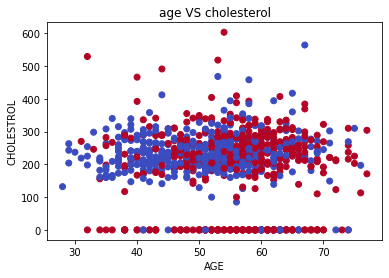

In [2]:
plt.scatter(df['Age'],df['Cholesterol'],c=df['HeartDisease'],cmap='coolwarm')
plt.xlabel('AGE')
plt.ylabel("CHOLESTROL")
plt.title('age VS cholesterol')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

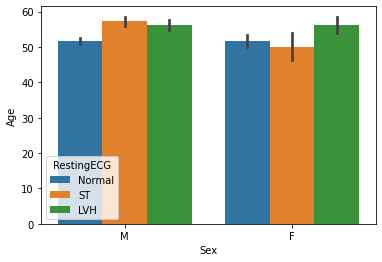

In [3]:
sns.barplot(x='Sex',y='Age',data=df,estimator=np.mean,hue='RestingECG')

In [4]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
chest_pain_type=pd.get_dummies(df['ChestPainType'],drop_first=True)
resting_ecg=pd.get_dummies(df['RestingECG'],drop_first=True)
exercise_angina=pd.get_dummies(df['ExerciseAngina'],drop_first=True)
st_slope=pd.get_dummies(df['ST_Slope'],drop_first=True)
df.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)
heart=pd.concat([df,sex,chest_pain_type,resting_ecg,exercise_angina,st_slope],axis=1)


In [5]:
heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [6]:
X=heart.drop('HeartDisease',axis=1)
Y=heart['HeartDisease']
X_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [7]:
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001]
}
knn=KNeighborsClassifier(n_neighbors=10)
lr=LogisticRegression()
gd_search=GridSearchCV(SVC(),param_grid)
rfc=RandomForestClassifier(n_estimators=200)

In [8]:
stack=StackingClassifier(estimators=[('rf',rfc),
                                     ('grid_search',gd_search),('knn',knn)],final_estimator=lr)
stack.fit(X_train,y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                               ('grid_search',
                                GridSearchCV(estimator=SVC(),
                                             param_grid={'C': [0.1, 1, 10, 100,
                                                               1000],
                                                         'gamma': [1, 0.1, 0.01,
                                                                   0.001,
                                                                   0.0001]})),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

In [9]:
pred=stack.predict(x_test)
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       107
           1       0.84      0.89      0.87       123

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [10]:
print(confusion_matrix(pred,y_test))

[[ 87  20]
 [ 14 109]]


In [ ]:
scaled_data=StandardScaler()
df_2=df.drop([])
scaled_data.fit()